# <span style="color:darkred"> Laboratorio di Simulazione Numerica </span>
## <span style="color:darkorange">  Esercitazione 12</span>

## 12.1

L'esercitazione richiede di usare dei modelli di *DNN* (*Deep Neural Network*) per riconoscere e distinguere fra loro dei numeri scritti a mano. Il dataset di *train* e di *validation* si chiama *MNIST* ed è costituito da $70000$ cifre ($60000$ di *train* e $10000$ di *validation*) ciascuna rappresentata da una immagine quadrata in una griglia di $28\times28$ pixels. In questo esercizio ho utilizzato una rete già costruita e modificando soltanto l'*optimizer* ho cercato quale minimizzasse di più la *loss*. Ho testato in particolare *SGD*, *Adam*, *Adagrad* e *Adamax*. Quest'ultima ho trovato essere quella migliore nel minimizzare la *loss* e ho notato che *SGD* invece risulta poco efficiente. Inoltre, anche il test dell'*accuracy* (funzione che indica man mano la performance della rete, in particolare la percentuale dei punti classificati in modo corretto) mostra che *Adamax* è un buon *optimizer*. Ho riportato la rete in cui ho utilizzato questo ottimizzatore e anche i risultati del test della *loss* e della *accuracy* che ho ottenuto dai modelli con le altre funzioni.

In [2]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [3]:
# Load and Process the Data

from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


an example of a data point with label 4


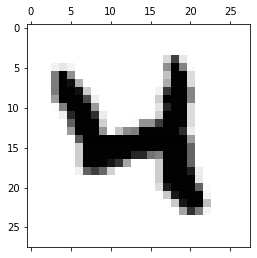

an example of a data point with label 4 before to_categorical ...
... and with label [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [4]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precesion
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

# look at an example of data point
print('an example of a data point with label', Y_train[20])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[20,:].reshape(28,28),cmap='binary')
plt.show()

print('an example of a data point with label', Y_train[20], 'before to_categorical ...')
# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[20], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [5]:
# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
keras.utils.to_categorical(labels)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [6]:
# Define the neural net and its architecture

from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [7]:
# Compile the model

from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam

def compile_model():
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adamax(),
                  metrics=['accuracy'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


In [8]:
# Train the model

batch_size = 32
epochs = 5

# create the deep neural net
model_DNN = compile_model()

# train DNN and store training info in history
history = model_DNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))


Test loss: 0.06364611402783776
Test accuracy: 0.9797999858856201


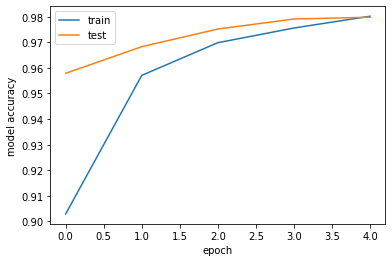

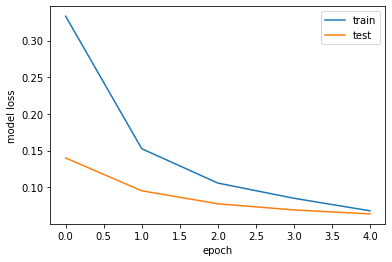

In [9]:
# Evaluate the Model Performance

# evaluate model
score = model_DNN.evaluate(X_test, Y_test, verbose=0)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

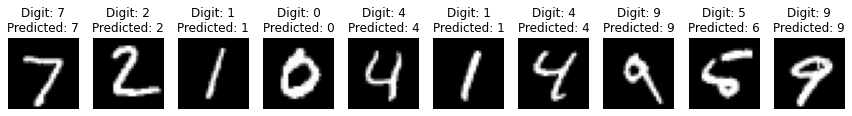

In [10]:
#X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
predictions = model_DNN.predict(X_test)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

**SGD**

Test loss: 0.15721166942715645

Test accuracy: 0.9521999955177307

**Adam**

Test loss: 0.07464247187546134

Test accuracy: 0.9782000184059143

**Adagrad**

Test loss: 0.07348936868654564

Test accuracy: 0.9765999913215637

**Adamax**

Test loss: 0.06364611402783776

Test accuracy: 0.9797999858856201

## 12.2

In questo esercizio ho implementato una rete neurale convoluzionale (*CNN*, *Covolutional Neural Network*). Ho aggiunto alla funzione alcuni *layer* convoluzionali, in particolare *Conv2D*, *MaxPooling2D*, *Dropout* con rate $0.5$, *Dense*, *Flatten* e infine *Dense* con funzione di attivazione *softmax*. Ho scelto inoltre *Adamax* poichè dai risultati dell'esercizio precedente l'ho trovato più efficiente.

Riporto poi i risultati predetti su alcune cifre del dataset dove si vede che la rete è in grado di riconoscerle tutte e  dal test della *loss* e *accurancy* si osserva che la rete ha dato buoni risultati.

In [11]:
# you will need the following for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [12]:
def create_CNN():
    # instantiate model
    model = Sequential()
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(16, kernel_size=(5,5)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    model.add(Dense(20, activation='softmax'))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adamax(),
                  metrics=['accuracy'])
    return model


Test loss: 0.11913963851481676
Test accuracy: 0.9646000266075134


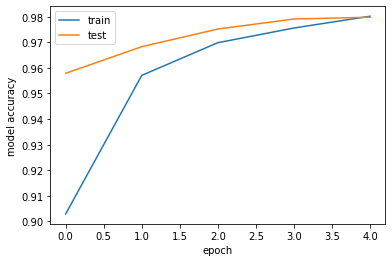

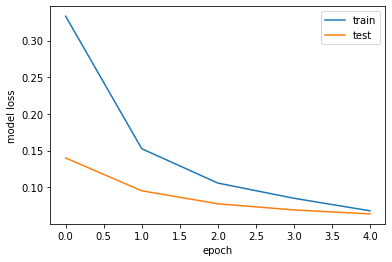

In [13]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train CNN
model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=0)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('model accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

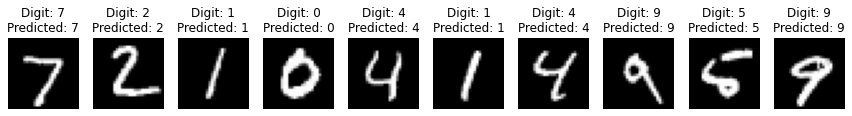

In [14]:
predictions = model_CNN.predict(X_test)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(X_test[i, :, :, 0], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
plt.show()

## 12.3

Nel terzo esercizio ho testato la rete neurale convoluzionale su alcune cifre che ho scritto a mano. Riporto di seguito i risultati in cui si vede che la rete riesce a riconoscere tutte e $10$ le cifre.

In [24]:
from PIL import Image
import os
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
digit_filename = "drive/My Drive/Colab Notebooks/zero.png"
digit_in = Image.open(digit_filename).convert('L')
ydim, xdim = digit_in.size
pix=digit_in.load();
data = np.zeros((10, xdim, ydim))
for j in range(ydim):
    for i in range(xdim):
        data[0, i,j]=pix[j,i]/255

digit_filename = "drive/My Drive/Colab Notebooks/uno.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[1, i,j]=pix[j,i]/255

digit_filename = "drive/My Drive/Colab Notebooks/due.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[2, i,j]=pix[j,i]/255

digit_filename = "drive/My Drive/Colab Notebooks/tre.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[3, i,j]=pix[j,i]/255

digit_filename = "drive/My Drive/Colab Notebooks/quattro.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[4, i,j]=pix[j,i]/255

digit_filename = "drive/My Drive/Colab Notebooks/cinque.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[5, i,j]=pix[j,i]/255

digit_filename = "drive/My Drive/Colab Notebooks/sei.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[6, i,j]=pix[j,i]/255

digit_filename = "drive/My Drive/Colab Notebooks/sette.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[7, i,j]=pix[j,i]/255

digit_filename = "drive/My Drive/Colab Notebooks/otto.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[8, i,j]=pix[j,i]/255

digit_filename = "drive/My Drive/Colab Notebooks/nove.png"
digit_in = Image.open(digit_filename).convert('L')
pix=digit_in.load();
for j in range(ydim):
    for i in range(xdim):
        data[9, i,j]=pix[j,i]/255

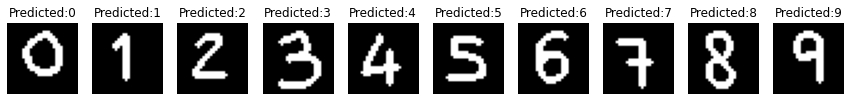

In [26]:
if keras.backend.image_data_format() == 'channels_first':
    data = data.reshape(data.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    data = data.reshape(data.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

pred_0 = model_CNN.predict(data)
plt.figure(figsize=(15,15))

for i in range(10):
  ax = plt.subplot(2, 10, i + 1)
  plt.imshow(data[i, :, :, 0], cmap='gray')
  plt.title("Predicted:{}".format(np.argmax(pred_0[i])))
  plt.axis('off') 
plt.show()